# Imports

In [1]:
import os
import matplotlib.pyplot as plt
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12

# Definition du chemin des datas

In [2]:
path_data = '.'

In [3]:
filename_lignes = 'Ligne.csv'
path_data_lignes = os.path.join(path_data, filename_lignes)
path_data_lignes

'./Ligne.csv'

# variable

In [4]:
indice = 0.2

# Creation du dataframe panda

In [5]:
df_lignes = pd.read_csv(path_data_lignes, sep=";", encoding= 'unicode_escape')

In [6]:
df_lignes

,N¡ CDE,L,Qte,Type,CodeClient,DateCreation,Gestionnaire,Type Menuiserie,Ouverture,Nb Zone,CA HT,Transformation,Unnamed: 12
0,140500651,1.0,1.0,C,2625.0,10/04/2018,ALU,HO,OF,1,"1032,9",140500651-02,NaN
1,140500651,2.0,1.0,C,2625.0,10/04/2018,ALU,HO,OF,1,"1032,9",140500651-02,NaN
2,140600145,1.0,8.0,C,5505.0,18/04/2018,ALU,FE,OF,1,"13566,08",140600145-03,NaN
3,140600145,2.0,1.0,C,5505.0,18/04/2018,ALU,PF,OF,1,"2126,06",140600145-03,NaN
4,140600145,3.0,1.0,C,5505.0,18/04/2018,ALU,FE,OF,1,"1268,37",140600145-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133753,220400553-00,1.0,1.0,D,7702.0,13/04/2022,BOIS,ODB,BAS,1,608,NaN,NaN
133754,220400560-00,1.0,1.0,D,5959.0,13/04/2022,ALU,ODB,FX,1,"1138,45",NaN,NaN
133755,220400560-00,2.0,0.0,D,5959.0,13/04/2022,ALU,ODB,FX,2,0,NaN,NaN
133756,220400561-00,1.0,1.0,D,12560.0,13/04/2022,ALU,FE,OF,1,"1374,98",NaN,NaN


In [7]:
df_lignes.dtypes

N¡ CDE              object
L                  float64
Qte                float64
Type                object
CodeClient         float64
DateCreation        object
Gestionnaire        object
Type Menuiserie     object
Ouverture           object
Nb Zone             object
CA HT               object
Transformation      object
Unnamed: 12         object
dtype: object

# Formattage des donnees

## Fichier Ligne

### Suppression des lignes sans N° Client

In [8]:
NbLigneAvant = df_lignes.shape[0]
df_lignes = df_lignes.drop(df_lignes[df_lignes.CodeClient.isnull()].index) 
NbLigneApres = df_lignes.shape[0]
print(str(NbLigneAvant - NbLigneApres) + ' lignes supprimée(s)')

100 lignes supprimée(s)


# range les donnéés

In [9]:
df_lignes["Date_Creation"] = df_lignes.DateCreation.astype("datetime64[ns]")
df_lignes["CodeClient"] = df_lignes.CodeClient.astype("int")
df_lignes["CA HT"] = df_lignes["CA HT"].astype("str").str.replace(",",".").astype("float")

df_lignes

,N¡ CDE,L,Qte,Type,CodeClient,DateCreation,Gestionnaire,Type Menuiserie,Ouverture,Nb Zone,CA HT,Transformation,Unnamed: 12,Date_Creation
0,140500651,1.0,1.0,C,2625,10/04/2018,ALU,HO,OF,1,1032.90,140500651-02,NaN,2018-10-04
1,140500651,2.0,1.0,C,2625,10/04/2018,ALU,HO,OF,1,1032.90,140500651-02,NaN,2018-10-04
2,140600145,1.0,8.0,C,5505,18/04/2018,ALU,FE,OF,1,13566.08,140600145-03,NaN,2018-04-18
3,140600145,2.0,1.0,C,5505,18/04/2018,ALU,PF,OF,1,2126.06,140600145-03,NaN,2018-04-18
4,140600145,3.0,1.0,C,5505,18/04/2018,ALU,FE,OF,1,1268.37,140600145-03,NaN,2018-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133753,220400553-00,1.0,1.0,D,7702,13/04/2022,BOIS,ODB,BAS,1,608.00,NaN,NaN,2022-04-13
133754,220400560-00,1.0,1.0,D,5959,13/04/2022,ALU,ODB,FX,1,1138.45,NaN,NaN,2022-04-13
133755,220400560-00,2.0,0.0,D,5959,13/04/2022,ALU,ODB,FX,2,0.00,NaN,NaN,2022-04-13
133756,220400561-00,1.0,1.0,D,12560,13/04/2022,ALU,FE,OF,1,1374.98,NaN,NaN,2022-04-13


# range data add champ nego and year

In [10]:
df_lignes['NCDE'] = df_lignes['N¡ CDE'].str.split('-', expand= True)[0]
df_lignes['year'] = df_lignes['DateCreation'].str.split('/', expand= True)[2]
df_lignes['month']= df_lignes['DateCreation'].str.split('/', expand= True)[1]

#  add champ is_devis and is_commande

In [11]:
df_lignes["is_devis"] = df_lignes["Type"] == "D"
df_lignes["is_commande"] = df_lignes["Type"] == "C"

# remove CA == 0

In [12]:
NbLigneAvant = df_lignes.shape[0]
df_lignes = df_lignes.loc[df_lignes["CA HT"] != 0]
NbLigneApres = df_lignes.shape[0]
print(str(NbLigneAvant - NbLigneApres) + ' lignes supprimée(s)')
df_lignes

17501 lignes supprimée(s)


,N¡ CDE,L,Qte,Type,CodeClient,DateCreation,Gestionnaire,Type Menuiserie,Ouverture,Nb Zone,CA HT,Transformation,Unnamed: 12,Date_Creation,NCDE,year,month,is_devis,is_commande
0,140500651,1.0,1.0,C,2625,10/04/2018,ALU,HO,OF,1,1032.90,140500651-02,NaN,2018-10-04,140500651,2018,04,False,True
1,140500651,2.0,1.0,C,2625,10/04/2018,ALU,HO,OF,1,1032.90,140500651-02,NaN,2018-10-04,140500651,2018,04,False,True
2,140600145,1.0,8.0,C,5505,18/04/2018,ALU,FE,OF,1,13566.08,140600145-03,NaN,2018-04-18,140600145,2018,04,False,True
3,140600145,2.0,1.0,C,5505,18/04/2018,ALU,PF,OF,1,2126.06,140600145-03,NaN,2018-04-18,140600145,2018,04,False,True
4,140600145,3.0,1.0,C,5505,18/04/2018,ALU,FE,OF,1,1268.37,140600145-03,NaN,2018-04-18,140600145,2018,04,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133752,220400549-00,1.0,1.0,D,11925,13/04/2022,PVC,ODB,OF,1,993.01,NaN,NaN,2022-04-13,220400549,2022,04,True,False
133753,220400553-00,1.0,1.0,D,7702,13/04/2022,BOIS,ODB,BAS,1,608.00,NaN,NaN,2022-04-13,220400553,2022,04,True,False
133754,220400560-00,1.0,1.0,D,5959,13/04/2022,ALU,ODB,FX,1,1138.45,NaN,NaN,2022-04-13,220400560,2022,04,True,False
133756,220400561-00,1.0,1.0,D,12560,13/04/2022,ALU,FE,OF,1,1374.98,NaN,NaN,2022-04-13,220400561,2022,04,True,False


In [13]:
df = df_lignes.loc[(df_lignes["is_commande"])&(df_lignes.year != '2022'), ['Date_Creation', 'CA HT']].groupby(["Date_Creation"]).sum().reset_index()
df.dtypes
df["Date_Creation"]

0     2018-01-06
1     2018-01-08
2     2018-01-10
3     2018-02-05
4     2018-02-07
         ...    
883   2021-12-17
884   2021-12-20
885   2021-12-21
886   2021-12-22
887   2021-12-23
Name: Date_Creation, Length: 888, dtype: datetime64[ns]

In [14]:
df["Date_Creation"] = pd.to_datetime(df["Date_Creation"].dt.strftime('%m/%Y'))
df["Date_Creation"]

0     2018-01-01
1     2018-01-01
2     2018-01-01
3     2018-02-01
4     2018-02-01
         ...    
883   2021-12-01
884   2021-12-01
885   2021-12-01
886   2021-12-01
887   2021-12-01
Name: Date_Creation, Length: 888, dtype: datetime64[ns]

In [15]:
y = df.groupby("Date_Creation").sum()
y

,CA HT
Date_Creation,
2018-01-01,80502.02
2018-02-01,78674.81
2018-03-01,235110.56
2018-04-01,353553.35
2018-05-01,353177.58
2018-06-01,453055.78
2018-07-01,293628.68
2018-08-01,198394.19
2018-09-01,268208.90


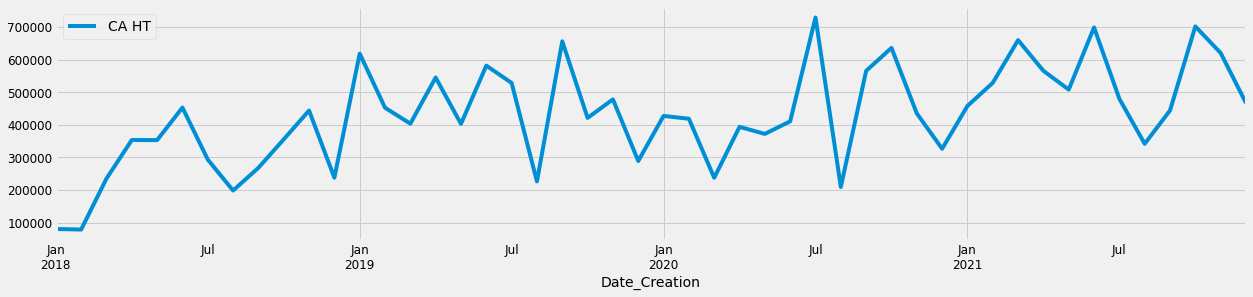

In [16]:
y.sort_index().plot(figsize=(19, 4))
plt.show()

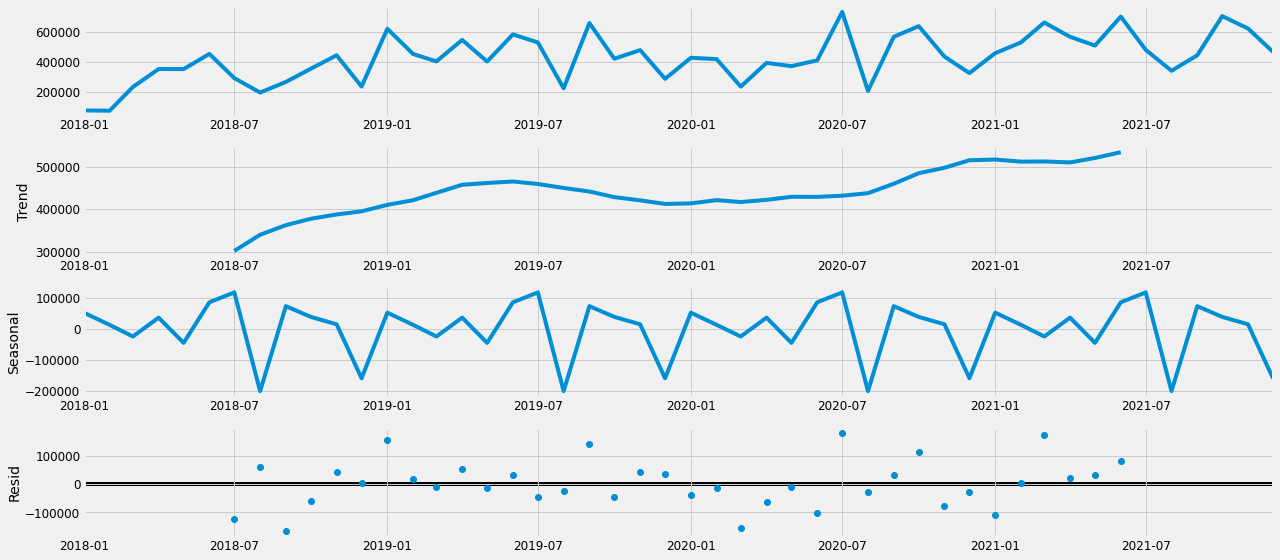

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period=12)
fig = decomposition.plot()
plt.show()

In [18]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [19]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1361.327039680488
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1480042.2598722603
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:948.4290598902994
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:621.1269171508466
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:983.269997589563
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1097152.2630900682
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:644.8851442056076


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:621.6321734041026
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1310.8143994678658


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1260883.4953999072
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:918.627296330402
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:596.6693482139857
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1018.1824810536563
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1090962.984418703
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:647.4060889436585
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:596.747876219427
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1250.90445197108
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:293732.2338806726
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:935.924554826543


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:600.385658609164
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:950.4127078191117
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:148765.77961936189
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:633.3966123232282
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:602.0256813175097
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1203.8250961246529


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:261180.05965550223
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:892.6561098752343
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:562.1147572335542


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:931.3510280477066


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Framewor

ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:110601.382110603
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:623.046537627931
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:564.1082162883865
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1277.4548179216474
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:292167.43670011667
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:945.3631270400984
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:622.4955448840061


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:947.9885652505839
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:146592.9445185821
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:621.3468250118145
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:623.1878098830198


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1231.76221229504
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:292049.7004217838
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:915.0690789209573


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:588.1991265815775
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:933.0742200582184


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:103169.46550273229


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:617.9680045220671


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:590.1990430694091
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1240.0624504852592
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:258087.4697848319
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:920.6300703474353
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:594.3775251235969
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:913.9679238686953
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:148387.8852911825


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:597.575213869864
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:596.2891769184467
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1205.4819019440806


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:185171.73162485953
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:891.9553574979524
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:562.4213968161699
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:906.9007384646583
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:123795.6730572219


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:597.726122281514
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:564.3766877801716


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2800      0.484     -0.578      0.563      -1.229       0.669
ma.L1         -0.5234      0.380     -1.377      0.169      -1.269       0.222
ar.S.L12      -0.0760      0.602     -0.126      0.900      -1.256       1.104
ma.S.L12      -0.6289      0.707     -0.889      0.374      -2.015       0.758
sigma2      2.786e+10   5.19e-11   5.37e+20      0.000    2.79e+10    2.79e+10


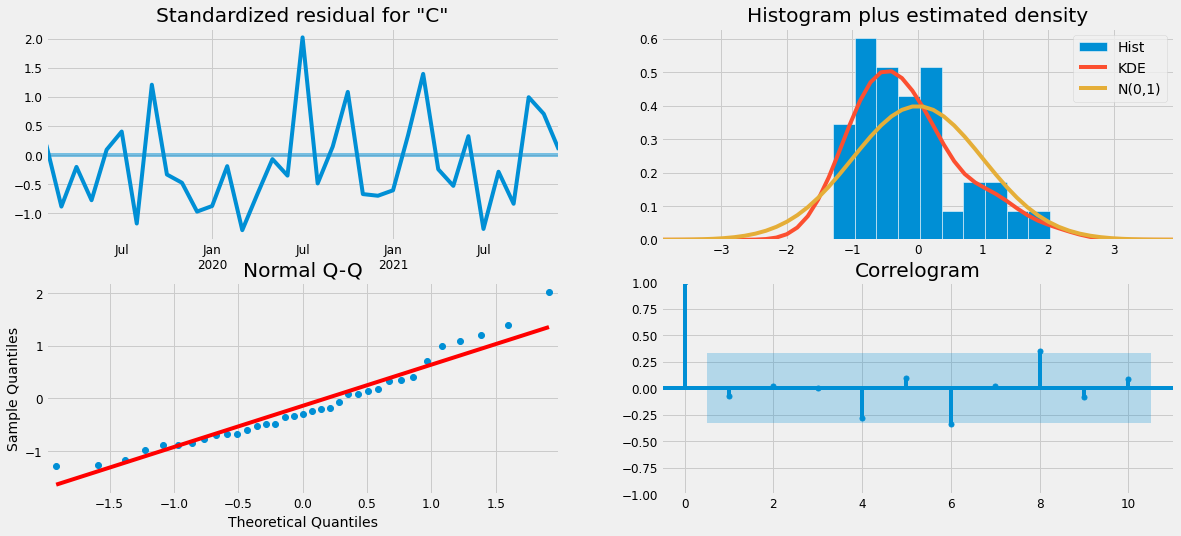

In [21]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

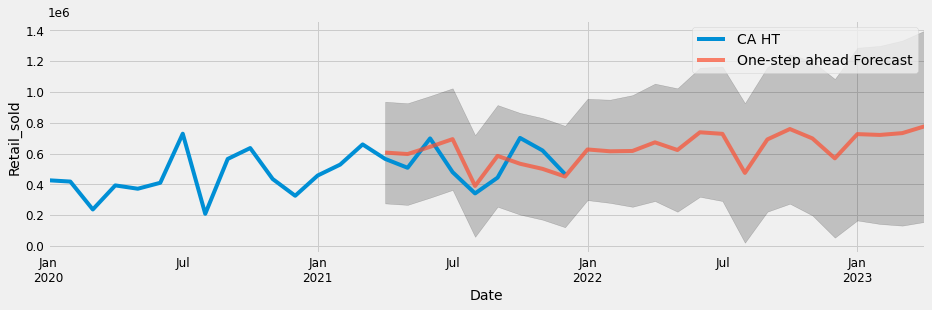

In [22]:
pred = results.get_prediction(start=pd.to_datetime('04/2021'), end=pd.to_datetime('04/2023'),dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [23]:
y_forecasted = pred.predicted_mean
y_truth = y['2021-1':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 2021-04-01 00:00:00   NaN
2021-05-01 00:00:00   NaN
2021-06-01 00:00:00   NaN
2021-07-01 00:00:00   NaN
2021-08-01 00:00:00   NaN
2021-09-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
2022-01-01 00:00:00   NaN
2022-02-01 00:00:00   NaN
2022-03-01 00:00:00   NaN
2022-04-01 00:00:00   NaN
2022-05-01 00:00:00   NaN
2022-06-01 00:00:00   NaN
2022-07-01 00:00:00   NaN
2022-08-01 00:00:00   NaN
2022-09-01 00:00:00   NaN
2022-10-01 00:00:00   NaN
2022-11-01 00:00:00   NaN
2022-12-01 00:00:00   NaN
2023-01-01 00:00:00   NaN
2023-02-01 00:00:00   NaN
2023-03-01 00:00:00   NaN
2023-04-01 00:00:00   NaN
CA HT                 NaN
dtype: float64
The Root Mean Squared Error is 2021-04-01 00:00:00   NaN
2021-05-01 00:00:00   NaN
2021-06-01 00:00:00   NaN
2021-07-01 00:00:00   NaN
2021-08-01 00:00:00   NaN
2021-09-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
2022-01-01 00:00:0

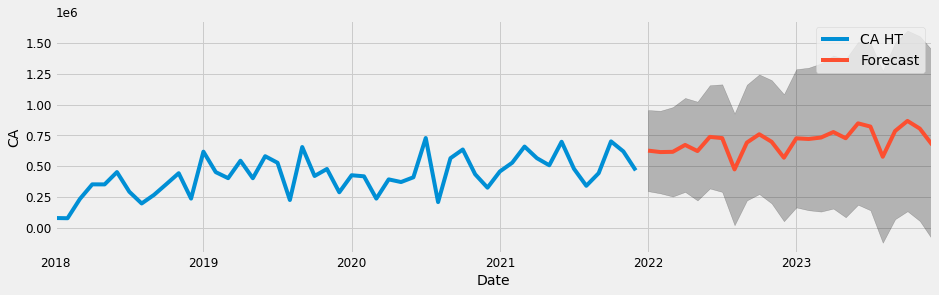

In [24]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CA')
plt.legend()
plt.show()

In [25]:
y_forecasted = pred.predicted_mean
y_forecasted.head(24)

2021-04-01    607062.331931
2021-05-01    597479.232114
2021-06-01    644328.678453
2021-07-01    694259.613826
2021-08-01    390146.696172
2021-09-01    585501.371921
2021-10-01    534454.545257
2021-11-01    501266.623626
2021-12-01    451605.902588
2022-01-01    627298.484814
2022-02-01    615430.486224
2022-03-01    617487.281624
2022-04-01    673414.066442
2022-05-01    623642.632453
2022-06-01    738730.225234
2022-07-01    728666.457566
2022-08-01    474915.404722
2022-09-01    692524.293239
2022-10-01    759959.675116
2022-11-01    699145.115657
2022-12-01    569630.839181
2023-01-01    726946.038732
2023-02-01    721594.350459
2023-03-01    733398.840848
Freq: MS, Name: predicted_mean, dtype: float64

In [26]:
y_truth.head(12)

,CA HT
Date_Creation,
2021-01-01,458078.73
2021-02-01,528943.05
2021-03-01,660086.22
2021-04-01,565940.63
2021-05-01,508281.57
2021-06-01,699082.41
2021-07-01,480074.51
2021-08-01,341877.80
2021-09-01,444295.18


In [27]:
y_truth.head(12).mean()

CA HT    539705.9325
dtype: float64

In [28]:
pred_ci.head(12)

,lower CA HT,upper CA HT
2022-01-01,298424.212856,9.561728e+05
2022-02-01,280573.501430,9.502875e+05
2022-03-01,255097.937997,9.798766e+05
2022-04-01,292406.485588,1.054422e+06
2022-05-01,223116.284876,1.024169e+06
2022-06-01,320073.219301,1.157387e+06
2022-07-01,292504.817269,1.164828e+06
2022-08-01,21954.878874,9.278759e+05
2022-09-01,223373.560260,1.161675e+06
2022-10-01,275104.376137,1.244815e+06


In [29]:
pred_ci.head(12).mean()

lower CA HT    2.280493e+05
upper CA HT    1.075425e+06
dtype: float64

In [30]:
pred_ci.tail(12)

,lower CA HT,upper CA HT
2023-01-01,166475.986049,1.287416e+06
2023-02-01,143681.550543,1.299507e+06
2023-03-01,132787.336902,1.334010e+06
2023-04-01,157085.068816,1.398789e+06
2023-05-01,86671.069725,1.368451e+06
2023-06-01,188203.418152,1.508606e+06
2023-07-01,143464.524040,1.501454e+06
2023-08-01,-119786.529875,1.274769e+06
2023-09-01,71265.776939,1.501424e+06
2023-10-01,135749.058781,1.600761e+06


In [31]:
pred_ci.tail(12).mean()

lower CA HT    8.918995e+04
upper CA HT    1.422606e+06
dtype: float64

In [32]:
forecast = pred_uc.predicted_mean
forecast.head(12)

2022-01-01    627298.484814
2022-02-01    615430.486224
2022-03-01    617487.281624
2022-04-01    673414.066442
2022-05-01    623642.632453
2022-06-01    738730.225234
2022-07-01    728666.457566
2022-08-01    474915.404722
2022-09-01    692524.293239
2022-10-01    759959.675116
2022-11-01    699145.115657
2022-12-01    569630.839181
Freq: MS, Name: predicted_mean, dtype: float64

In [33]:
forecast.head(12).mean()

651737.080189221

In [34]:
forecast.tail(12).mean()

755897.9519448968

# ALU avec CA ForceCase

In [35]:
df = df_lignes.loc[(df_lignes["is_commande"])&(df_lignes.year != '2022')&(df_lignes.Gestionnaire == 'BOIS'), ['Date_Creation', 'CA HT']].groupby(["Date_Creation"]).sum().reset_index()
df.dtypes
df["Date_Creation"] = pd.to_datetime(df["Date_Creation"].dt.strftime('%m/%Y'))
df["Date_Creation"]

0     2018-01-01
1     2018-01-01
2     2018-01-01
3     2018-02-01
4     2018-02-01
         ...    
852   2021-12-01
853   2021-12-01
854   2021-12-01
855   2021-12-01
856   2021-12-01
Name: Date_Creation, Length: 857, dtype: datetime64[ns]

In [36]:
y = df.groupby("Date_Creation").sum()
y

,CA HT
Date_Creation,
2018-01-01,13401.73
2018-02-01,15182.53
2018-03-01,40144.62
2018-04-01,59422.81
2018-05-01,62052.01
2018-06-01,94036.83
2018-07-01,37649.56
2018-08-01,22084.02
2018-09-01,66480.53


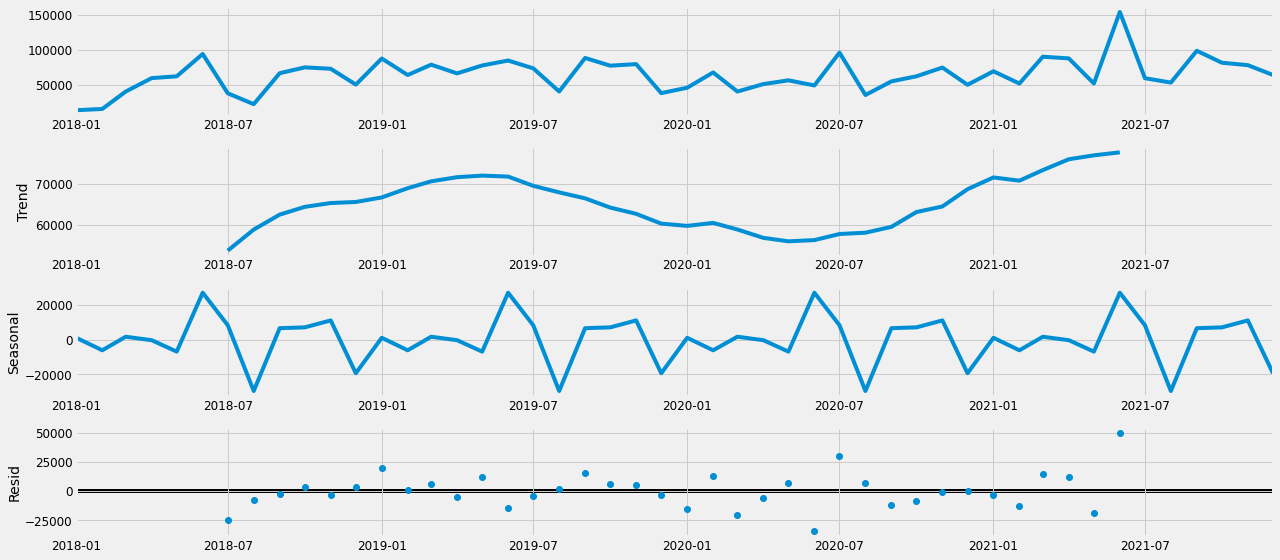

In [37]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period=12)
fig = decomposition.plot()
plt.show()

In [38]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1183.2691500228586
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:48484.66541997016
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:825.9271702350871
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:542.4593212026465
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:855.3145565124058


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:40782.19300513181
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:560.3062095183507
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:540.3272662604322
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1138.4099855642478


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Framewor

ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:40564.70663605591
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:802.3293738838705
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:521.1448719653523
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:883.6128647838507


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Framewor

ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:31355.31762733191
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:562.5501615046176
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:515.6960949540725
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1089.8680922698395
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:12273.156486615084
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:825.0862601593943
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:530.5459292764876
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:833.8752503902357
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:10843.63303569305
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:558.2547000066226


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:528.6332915980295
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1044.6380793843696
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:10490.223367394461
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:777.8620792160433


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:492.90265933447716
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:809.583293544059


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:8910.764604033586
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:542.0904632652164


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:493.5619762645709
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1112.1563355534745
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:12344.478576689891
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:826.5739828558783
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:544.15406842526


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:828.6247917645408


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Framewor

ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1652.380110354991
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:539.6163874250624
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:541.2836766444855
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1069.4267900717703


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Framewor

ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:9812.60987122804
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:800.9767581746703
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:515.9416172076617
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:811.4736439037231


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:8980.814935400274


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:541.0268129408313


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:511.54987097778354
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1077.8237915258078
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:11995.636464909552
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:808.6350165802077
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:521.0247657014346


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:797.5564243117768
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:10842.230929354344
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:526.0725837953937
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:519.8089585369753


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1045.771192472747


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:9863.30131287934
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:780.9460169239611
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:491.9541265264662


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework

ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:786.9453762711402


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Framewor

ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:8607.545445802007
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:522.1116195033136
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:492.7781228563616


In [39]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4083      0.428     -0.954      0.340      -1.247       0.430
ma.L1         -0.5041      0.368     -1.368      0.171      -1.226       0.218
ar.S.L12      -0.3339      0.580     -0.575      0.565      -1.471       0.803
ma.S.L12      -0.5550      0.744     -0.746      0.456      -2.013       0.903
sigma2      9.363e+08   1.17e-09   7.97e+17      0.000    9.36e+08    9.36e+08


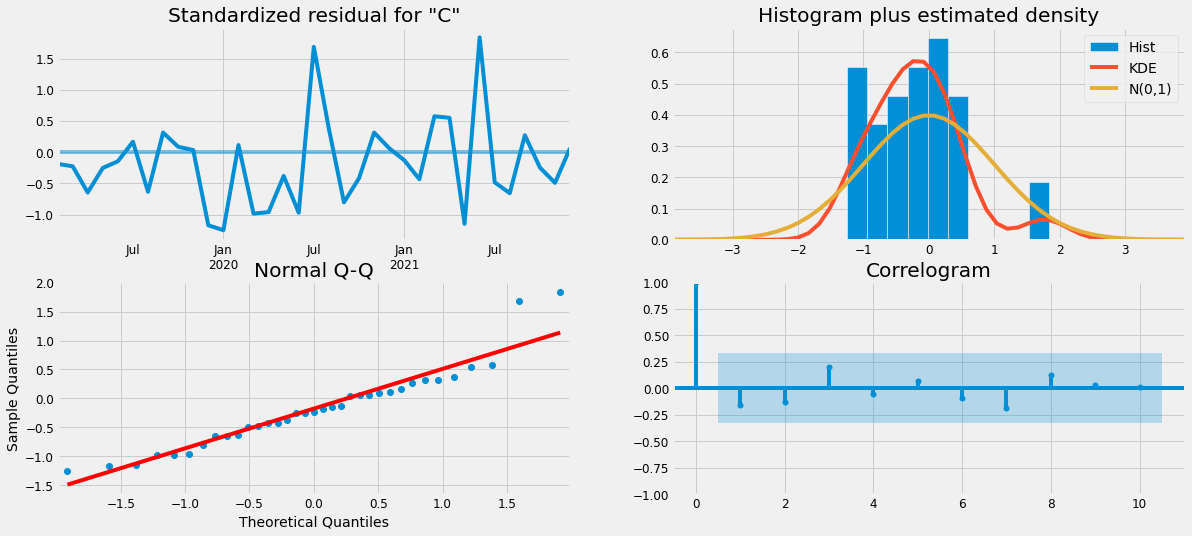

In [40]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

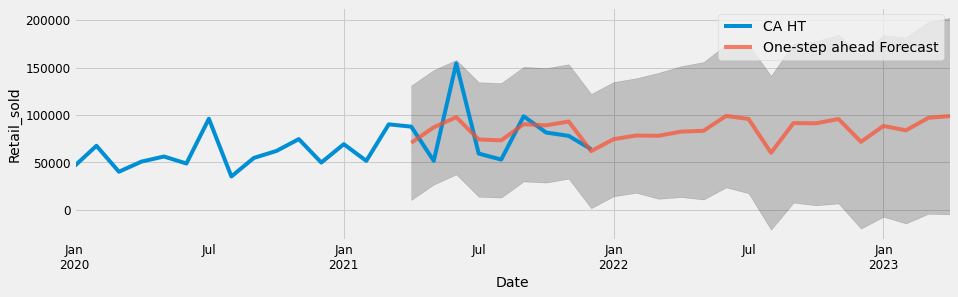

In [41]:
pred = results.get_prediction(start=pd.to_datetime('04/2021'), end=pd.to_datetime('04/2023'),dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [42]:
y_forecasted = pred.predicted_mean
y_truth = y['2021-1':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 2021-04-01 00:00:00   NaN
2021-05-01 00:00:00   NaN
2021-06-01 00:00:00   NaN
2021-07-01 00:00:00   NaN
2021-08-01 00:00:00   NaN
2021-09-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
2022-01-01 00:00:00   NaN
2022-02-01 00:00:00   NaN
2022-03-01 00:00:00   NaN
2022-04-01 00:00:00   NaN
2022-05-01 00:00:00   NaN
2022-06-01 00:00:00   NaN
2022-07-01 00:00:00   NaN
2022-08-01 00:00:00   NaN
2022-09-01 00:00:00   NaN
2022-10-01 00:00:00   NaN
2022-11-01 00:00:00   NaN
2022-12-01 00:00:00   NaN
2023-01-01 00:00:00   NaN
2023-02-01 00:00:00   NaN
2023-03-01 00:00:00   NaN
2023-04-01 00:00:00   NaN
CA HT                 NaN
dtype: float64
The Root Mean Squared Error is 2021-04-01 00:00:00   NaN
2021-05-01 00:00:00   NaN
2021-06-01 00:00:00   NaN
2021-07-01 00:00:00   NaN
2021-08-01 00:00:00   NaN
2021-09-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
2022-01-01 00:00:0

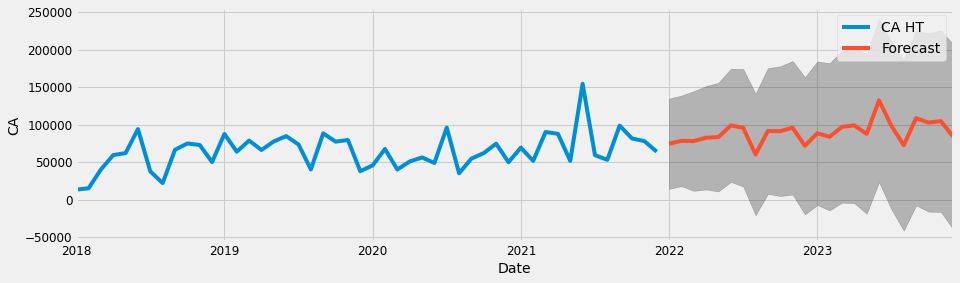

In [43]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CA')
plt.legend()
plt.show()

In [44]:
y_forecasted = pred.predicted_mean
y_forecasted.head(24)

2021-04-01    70763.903090
2021-05-01    87051.309130
2021-06-01    97696.268855
2021-07-01    74206.528238
2021-08-01    73299.364328
2021-09-01    90344.822016
2021-10-01    89099.276384
2021-11-01    93164.528033
2021-12-01    61971.605388
2022-01-01    74546.862366
2022-02-01    78375.082675
2022-03-01    78114.743090
2022-04-01    82491.984459
2022-05-01    83381.822222
2022-06-01    99017.363473
2022-07-01    95818.539968
2022-08-01    60211.713589
2022-09-01    91491.611219
2022-10-01    91266.176787
2022-11-01    95761.781950
2022-12-01    71776.785338
2023-01-01    88450.208660
2023-02-01    83843.527059
2023-03-01    97045.405193
Freq: MS, Name: predicted_mean, dtype: float64

In [45]:
y_truth.head(12)

,CA HT
Date_Creation,
2021-01-01,69262.43
2021-02-01,51670.14
2021-03-01,90162.21
2021-04-01,87733.92
2021-05-01,51703.35
2021-06-01,154358.23
2021-07-01,59339.40
2021-08-01,53045.75
2021-09-01,98679.22


In [46]:
y_truth.head(12).mean()

CA HT    78286.9875
dtype: float64

In [47]:
pred_ci.head(12)

,lower CA HT,upper CA HT
2022-01-01,14365.120374,134728.604358
2022-02-01,18030.329488,138719.835862
2022-03-01,11719.312759,144510.173421
2022-04-01,13574.456493,151409.512426
2022-05-01,10962.709009,155800.935434
2022-06-01,23695.168005,174339.558941
2022-07-01,17533.447136,174103.632800
2022-08-01,-20864.165766,141287.592944
2022-09-01,7698.798058,175284.424379
2022-10-01,4835.397572,177696.956003


In [48]:
pred_ci.head(12).mean()

lower CA HT      7388.085162
upper CA HT    159654.326027
dtype: float64

In [49]:
pred_ci.tail(12)

,lower CA HT,upper CA HT
2023-01-01,-7219.546305,184119.963625
2023-02-01,-14254.160672,181941.214789
2023-03-01,-4010.283429,198101.093815
2023-04-01,-4752.307988,202625.506570
2023-05-01,-18764.453934,193938.558203
2023-06-01,23328.810520,241151.760931
2023-07-01,-13027.021427,209826.755689
2023-08-01,-41308.849822,186456.758521
2023-09-01,-7635.729842,224932.802289
2023-10-01,-15883.337629,221412.735081


In [50]:
pred_ci.tail(12).mean()

lower CA HT    -13265.885941
upper CA HT    206433.972786
dtype: float64

In [51]:
forecast = pred_uc.predicted_mean
forecast.head(12)

2022-01-01    74546.862366
2022-02-01    78375.082675
2022-03-01    78114.743090
2022-04-01    82491.984459
2022-05-01    83381.822222
2022-06-01    99017.363473
2022-07-01    95818.539968
2022-08-01    60211.713589
2022-09-01    91491.611219
2022-10-01    91266.176787
2022-11-01    95761.781950
2022-12-01    71776.785338
Freq: MS, Name: predicted_mean, dtype: float64

In [52]:
forecast.head(12).mean()

83521.20559466125

In [53]:
forecast.tail(12).mean()

96584.0434223977